In [1]:
# Import dependencies neeeded for the project
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# The instructions for uploading the data through an API request was detailed on the data website
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# First 60000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("j2j3-acqj", limit=60000)

# Convert to pandas dataframe
results_df = pd.DataFrame.from_records(results)

results_df.head()

,parcel_s,building_name,building_address,postal_code,floor_area,property_type,property_type_self_selected,pim_link,year_built,energy_audit_due_date,...,_2011_energy_star_score,_2022_reason_for_exemption,_2021_reason_for_exemption,_2020_reason_for_exemption,_2019_district_steam_use_kbtu_,_2018_district_steam_use_kbtu_,_2022_district_steam_use_kbtu_,_2021_district_steam_use_kbtu_,_2020_district_steam_use_kbtu_,_2020_energy_star_score
0,3572/001,23088-San Francisco/Treat Ave,300 Treat Ave,94110,69700,Commercial,Self-Storage Facility,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1908,2021-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0010/001,2801 Leavenworth Street,2801 LEAVENWORTH ST,94109,133675,Commercial,Office,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2024-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1145/003-J,Dorraine Zief Law Library,2101 Fulton St,94117,67014,Commercial,College/University,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,NaN,2022-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0010/002,Argonaut Hotel-SV,495 JEFFERSON ST,94109,180000,Commercial,Hotel,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1907,2025-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9900/045-A,Pier 45 - Shed A,45 PIER - SHED A,94133,71455,Commercial - Port Facility,Parking,{'url': 'https://sfplanninggis.org/PIM/?tab=Pr...,1900,2099-04-01T00:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Clean up data by only keeping the specific rows we want for our data analysis
# Drop all rows with NaN or Not Available or 0
# Lump all commercial buildings into one type
clean_results_df = results_df.loc[:,['building_name', 'floor_area', 'property_type', 'property_type_self_selected','year_built', '_2022_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2022_total_ghg_emissions_intensity_kgco2e_ft2_', '_2021_weather_normalized_source_eui_kbtu_ft2_', 
                                    '_2021_total_ghg_emissions_intensity_kgco2e_ft2_', '_2020_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2020_total_ghg_emissions_intensity_kgco2e_ft2_', 'a_2019_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2019_total_ghg_emissions_intensity_kgco2e_ft2_', '_2018_weather_normalized_source_eui_kbtu_ft2_',
                                    '_2018_total_ghg_emissions_intensity_kgco2e_ft2_']]
results_na = clean_results_df.replace("Not Available", np.nan)
results_na = clean_results_df.replace("0", np.nan)
clean_results_df = results_na.dropna()
clean_results_df = clean_results_df.replace("Commercial - Port Facility", "Commercial")
clean_results_df


,building_name,floor_area,property_type,property_type_self_selected,year_built,_2022_weather_normalized_source_eui_kbtu_ft2_,_2022_total_ghg_emissions_intensity_kgco2e_ft2_,_2021_weather_normalized_source_eui_kbtu_ft2_,_2021_total_ghg_emissions_intensity_kgco2e_ft2_,_2020_weather_normalized_source_eui_kbtu_ft2_,_2020_total_ghg_emissions_intensity_kgco2e_ft2_,a_2019_weather_normalized_source_eui_kbtu_ft2_,_2019_total_ghg_emissions_intensity_kgco2e_ft2_,_2018_weather_normalized_source_eui_kbtu_ft2_,_2018_total_ghg_emissions_intensity_kgco2e_ft2_
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3,195.6,6.4,205,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,CA800_Avalon Mission Bay II,345686,Mixed Residential,Multifamily Housing,2006,66.5,2,68.5,1.8,71.5,1.9,86.1,2.5,89.4,2.6
2522,355 BERRY ST,296800,Mixed Residential,Multifamily Housing,2007,41.4,1.3,43.2,1.2,41.4,1.2,42.5,1.4,79,2.5
2526,325 BERRY ST,166257,Mixed Residential,Multifamily Housing,2007,68.4,2.2,74.7,2.2,75.3,2.3,74.8,2.4,77,2.3
2533,CA067_Avalon at Mission Bay I (cb93),295933,Mixed Residential,Multifamily Housing,2003,66.6,1.9,69.8,1.8,69.6,1.5,55.4,1.7,52.4,1.6


In [4]:
# Rename the columns in the data frame to make it easier to read

clean_results_df = clean_results_df.rename(columns = {'building_name':'Building Name', 'floor_area':'Floor Area', 'property_type':'Property Type', 'property_type_self_selected': 'Property Subcategory','year_built':'Year Built', 
                                   '_2022_weather_normalized_source_eui_kbtu_ft2_':'2022 Source EUI (kBtu/ft2)', '_2022_total_ghg_emissions_intensity_kgco2e_ft2_':'2022 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2021_weather_normalized_source_eui_kbtu_ft2_':'2021 Source EUI (kBtu/ft2)', '_2021_total_ghg_emissions_intensity_kgco2e_ft2_':'2021 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2020_weather_normalized_source_eui_kbtu_ft2_':'2020 Source EUI (kBtu/ft2)', '_2020_total_ghg_emissions_intensity_kgco2e_ft2_':'2020 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   'a_2019_weather_normalized_source_eui_kbtu_ft2_':'2019 Source EUI (kBtu/ft2)', '_2019_total_ghg_emissions_intensity_kgco2e_ft2_':'2019 Total GHG Emissions Intensity (kGCO2e/ft2)',
                                   '_2018_weather_normalized_source_eui_kbtu_ft2_':'2018 Source EUI (kBtu/ft2)', '_2018_total_ghg_emissions_intensity_kgco2e_ft2_':'2018 Total GHG Emissions Intensity (kGCO2e/ft2)'})

# Change the data type to float for all numerical entries
clean_results_df = clean_results_df.astype({'2022 Source EUI (kBtu/ft2)': 'float',
                                            '2022 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2021 Source EUI (kBtu/ft2)': 'float',
                                            '2021 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2020 Source EUI (kBtu/ft2)': 'float',
                                            '2020 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2019 Source EUI (kBtu/ft2)': 'float',
                                            '2019 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float',
                                            '2018 Source EUI (kBtu/ft2)': 'float',
                                            '2018 Total GHG Emissions Intensity (kGCO2e/ft2)': 'float'})



clean_results_df

,Building Name,Floor Area,Property Type,Property Subcategory,Year Built,2022 Source EUI (kBtu/ft2),2022 Total GHG Emissions Intensity (kGCO2e/ft2),2021 Source EUI (kBtu/ft2),2021 Total GHG Emissions Intensity (kGCO2e/ft2),2020 Source EUI (kBtu/ft2),2020 Total GHG Emissions Intensity (kGCO2e/ft2),2019 Source EUI (kBtu/ft2),2019 Total GHG Emissions Intensity (kGCO2e/ft2),2018 Source EUI (kBtu/ft2),2018 Total GHG Emissions Intensity (kGCO2e/ft2)
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21.0,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3.0,195.6,6.4,205.0,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,CA800_Avalon Mission Bay II,345686,Mixed Residential,Multifamily Housing,2006,66.5,2.0,68.5,1.8,71.5,1.9,86.1,2.5,89.4,2.6
2522,355 BERRY ST,296800,Mixed Residential,Multifamily Housing,2007,41.4,1.3,43.2,1.2,41.4,1.2,42.5,1.4,79.0,2.5
2526,325 BERRY ST,166257,Mixed Residential,Multifamily Housing,2007,68.4,2.2,74.7,2.2,75.3,2.3,74.8,2.4,77.0,2.3
2533,CA067_Avalon at Mission Bay I (cb93),295933,Mixed Residential,Multifamily Housing,2003,66.6,1.9,69.8,1.8,69.6,1.5,55.4,1.7,52.4,1.6


In [5]:
# counts for each property type
property_type_counts = clean_results_df.groupby(['Property Type'])['Building Name'].count()
property_type_counts.sort_values(ascending=False)


Property Type
Commercial           604
Mixed Residential     83
Name: Building Name, dtype: int64

In [6]:
# counts for each subcategory type
property_subcategory_counts = clean_results_df.groupby(['Property Subcategory'])['Building Name'].count()
property_subcategory_counts.sort_values(ascending=False)

Property Subcategory
Office                                                   333
Multifamily Housing                                       73
Hotel                                                     47
Retail Store                                              31
Mixed Use Property                                        30
Other                                                     26
Worship Facility                                          15
Supermarket/Grocery Store                                 14
College/University                                        10
Medical Office                                             9
Non-Refrigerated Warehouse                                 7
Bank Branch                                                7
Restaurant                                                 5
Manufacturing/Industrial Plant                             5
K-12 School                                                5
Laboratory                                                 4
Str

# Is there a correlation between energy use and building floor area?

In [7]:
clean_results_df = clean_results_df.dropna()
clean_results_df

,Building Name,Floor Area,Property Type,Property Subcategory,Year Built,2022 Source EUI (kBtu/ft2),2022 Total GHG Emissions Intensity (kGCO2e/ft2),2021 Source EUI (kBtu/ft2),2021 Total GHG Emissions Intensity (kGCO2e/ft2),2020 Source EUI (kBtu/ft2),2020 Total GHG Emissions Intensity (kGCO2e/ft2),2019 Source EUI (kBtu/ft2),2019 Total GHG Emissions Intensity (kGCO2e/ft2),2018 Source EUI (kBtu/ft2),2018 Total GHG Emissions Intensity (kGCO2e/ft2)
0,23088-San Francisco/Treat Ave,69700,Commercial,Self-Storage Facility,1908,19.5,0.5,38.6,0.8,20.6,0.5,21.0,0.5,33.4,0.8
4,Pier 45 - Shed A,71455,Commercial,Parking,1900,13.4,0.3,14.9,0.3,25.6,0.6,18.6,0.5,14.2,0.4
9,211 Jefferson St,40052,Commercial,Retail Store,1953,46.4,1.1,60.3,1.3,106.8,2.8,159.8,4.4,132.5,3.8
15,2770 TAYLOR ST,40017,Commercial,Mixed Use Property,1966,164.1,5.2,150.3,4.4,99.9,3.0,195.6,6.4,205.0,6.9
17,Wharf Plaza Apartments -1855,45812,Mixed Residential,Multifamily Housing,1983,34.7,1.5,42.9,1.7,43.2,1.8,70.3,2.3,70.7,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,CA800_Avalon Mission Bay II,345686,Mixed Residential,Multifamily Housing,2006,66.5,2.0,68.5,1.8,71.5,1.9,86.1,2.5,89.4,2.6
2522,355 BERRY ST,296800,Mixed Residential,Multifamily Housing,2007,41.4,1.3,43.2,1.2,41.4,1.2,42.5,1.4,79.0,2.5
2526,325 BERRY ST,166257,Mixed Residential,Multifamily Housing,2007,68.4,2.2,74.7,2.2,75.3,2.3,74.8,2.4,77.0,2.3
2533,CA067_Avalon at Mission Bay I (cb93),295933,Mixed Residential,Multifamily Housing,2003,66.6,1.9,69.8,1.8,69.6,1.5,55.4,1.7,52.4,1.6


The correlation between commercial buildings floor area and their energy use in 2022 in SF is: 0.0878


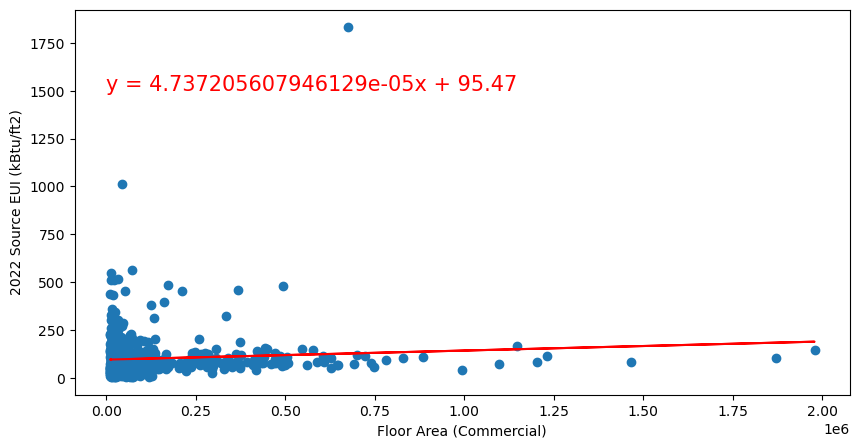

In [8]:

# Filter the DataFrame to include only 'Commercial' properties
commercial_df = clean_results_df[clean_results_df['Property Type'] == 'Commercial']

# Create a figure with a specific size
plt.figure(figsize=(10, 5))

# Create a scatter plot using the floor area and energy use columns
# Extract the floor area and energy use values as floats
flr_area_1c = commercial_df.iloc[:, 1].astype(float)
engy_use_2022c = commercial_df.iloc[:, 5].astype(float)
plt.scatter(flr_area_1c, engy_use_2022c)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_1c, engy_use_2022c)

# Calculate regression line values
regress_values = flr_area_1c * slope + intercept

plt.plot(flr_area_1c, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 1500), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_1c = rvalue

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Commercial)')
plt.ylabel('2022 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between commercial buildings floor area and their energy use in 2022 in SF is: {round(correlation_1c, 4)}')
# Display the plot
plt.show()



The correlation between mixed residential buildings floor area and their energy use in 2022 in SF is: -0.097


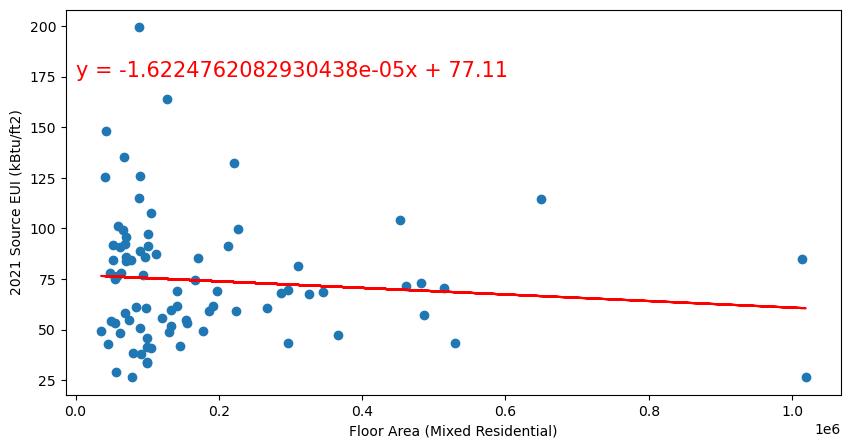

In [10]:
# Filter the DataFrame to include only 'Mixed Residential' properties
Mixed_Residential_df = clean_results_df[clean_results_df['Property Type'] == 'Mixed Residential']

plt.figure(figsize=(10, 5))

# Create a scatter plot using the floor area and energy use columns
# Extract the floor area and energy use values as floats
flr_area_1m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2022m = Mixed_Residential_df.iloc[:, 7].astype(float)
plt.scatter(flr_area_1m, engy_use_2022m)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_1m, engy_use_2022m)

# Calculate regression line values
regress_values = flr_area_1m * slope + intercept

plt.plot(flr_area_1m, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 175), fontsize=15, color="red")

# Calculate the correlation coefficient
#correlation_1m = st.pearsonr(flr_area_1m, engy_use_2022m)
correlation_1m = rvalue
# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Mixed Residential)')
plt.ylabel('2021 Source EUI (kBtu/ft2)')

# Print the correlation value
#print(f'The correlation between mixed residential buildings floor area and their energy use in 2022 in SF is: {round(correlation_1m[0], 4)}')
print(f'The correlation between mixed residential buildings floor area and their energy use in 2022 in SF is: {round(correlation_1m, 4)}')
# Display the plot
plt.show()



The correlation between commercial buildings floor area and their energy use in 2021 in SF is: 0.0885


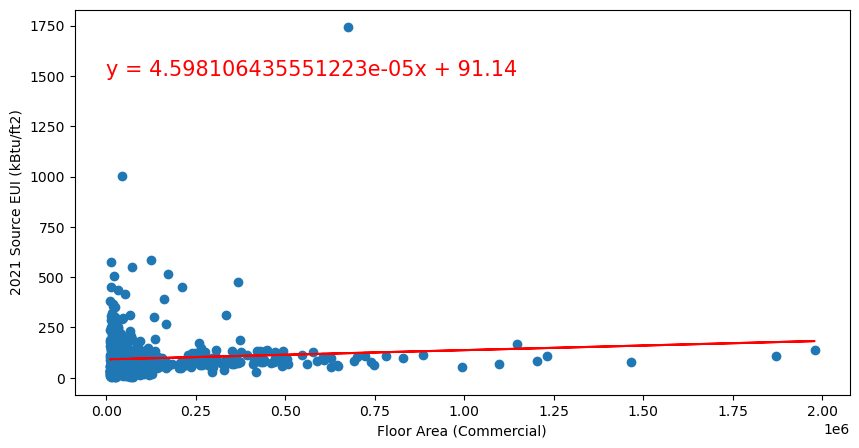

In [11]:

# Filter the DataFrame to include only 'Commercial' properties
commercial_df = clean_results_df[clean_results_df['Property Type'] == 'Commercial']

plt.figure(figsize=(10, 5))

# Extract the floor area and energy use values as floats
flr_area_2c = commercial_df.iloc[:, 1].astype(float)
engy_use_2021c = commercial_df.iloc[:, 7].astype(float)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_2c, engy_use_2021c)

# Calculate regression line values
regress_values = flr_area_2c * slope + intercept

plt.plot(flr_area_2c, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 1500), fontsize=15, color="red")

# Calculate the correlation coefficient
#correlation_2c = st.pearsonr(flr_area_2c, engy_use_2021c)
correlation_2c = rvalue
# Create a scatter plot using the floor area and energy use columns
plt.scatter(flr_area_2c, engy_use_2021c)

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Commercial)')
plt.ylabel('2021 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between commercial buildings floor area and their energy use in 2021 in SF is: {round(correlation_2c, 4)}')

# Display the plot
plt.show()


The correlation between mixed residential buildings floor area and their energy use in 2021 in SF is: -0.097


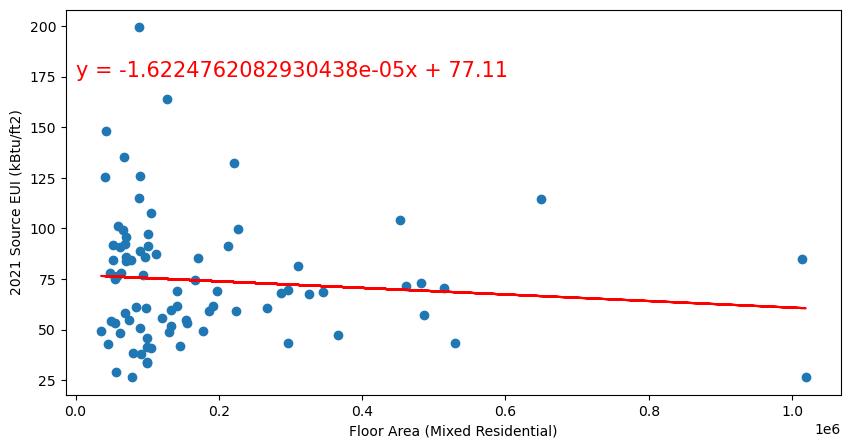

In [12]:

# Filter the DataFrame to include only 'Mixed Residential' properties
Mixed_Residential_df = clean_results_df[clean_results_df['Property Type'] == 'Mixed Residential']

plt.figure(figsize=(10, 5))

# Extract the floor area and energy use values as floats
flr_area_2m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2021m = Mixed_Residential_df.iloc[:, 7].astype(float)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_2m, engy_use_2021m)

# Calculate regression line values
regress_values = flr_area_2m * slope + intercept

plt.plot(flr_area_2m, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 175), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_2m = rvalue

# Create a scatter plot using the floor area and energy use columns
plt.scatter(flr_area_2m, engy_use_2021m)

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Mixed Residential)')
plt.ylabel('2021 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between mixed residential buildings floor area and their energy use in 2021 in SF is: {round(correlation_2m, 4)}')

# Display the plot
plt.show()


The correlation between commercial buildings floor area and their energy use in 2020 in SF is: 0.0818


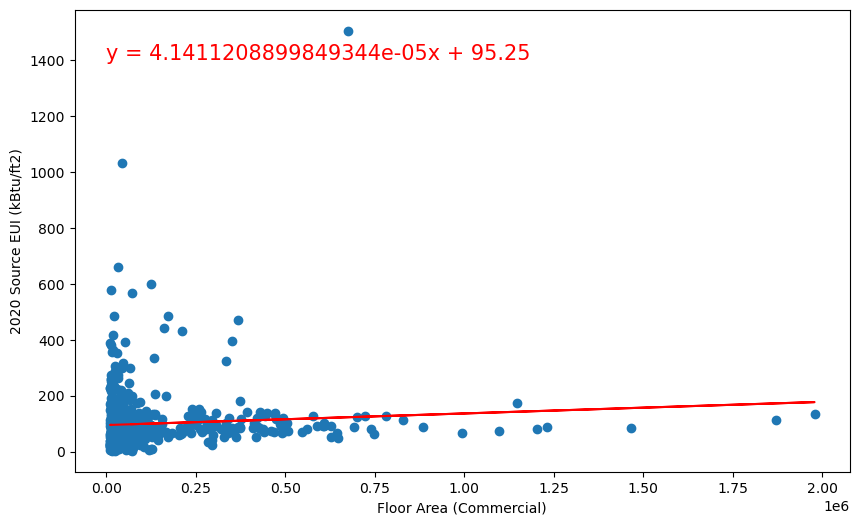

In [13]:

# Filter the DataFrame to include only 'Commercial' properties
commercial_df = clean_results_df[clean_results_df['Property Type'] == 'Commercial']

# Create a new figure with a specific size
plt.figure(figsize=(10, 6))

# Extract the floor area and energy use values as floats
flr_area_3c = commercial_df.iloc[:, 1].astype(float)
engy_use_2020c = commercial_df.iloc[:, 9].astype(float)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_3c, engy_use_2020c)

# Calculate regression line values
regress_values = flr_area_3c * slope + intercept

plt.plot(flr_area_3c, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 1400), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_3c = rvalue

# Create a scatter plot using the floor area and energy use columns
plt.scatter(flr_area_3c, engy_use_2020c)

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Commercial)')
plt.ylabel('2020 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between commercial buildings floor area and their energy use in 2020 in SF is: {round(correlation_3c, 4)}')

# Display the plot
plt.show()


The correlation between mixed residential buildings floor area and their energy use in 2020 in SF is: -0.083


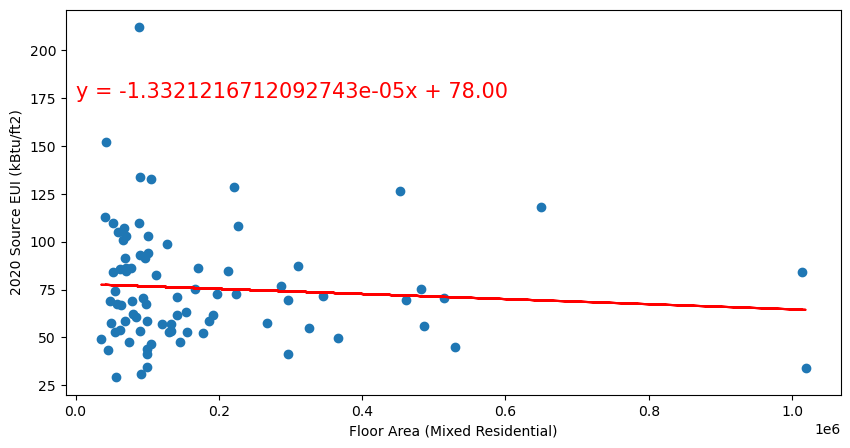

In [14]:

# Filter the DataFrame to include only 'Mixed Residential' properties
Mixed_Residential_df = clean_results_df[clean_results_df['Property Type'] == 'Mixed Residential']
plt.figure(figsize=(10, 5))

# Extract the floor area and energy use values as floats
flr_area_3m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2020m = Mixed_Residential_df.iloc[:, 9].astype(float)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_3m, engy_use_2020m)

# Calculate regression line values
regress_values = flr_area_3m * slope + intercept

plt.plot(flr_area_3m, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 175), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_3m = rvalue

# Create a scatter plot using the floor area and energy use columns
plt.scatter(flr_area_3m, engy_use_2020m)

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Mixed Residential)')
plt.ylabel('2020 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between mixed residential buildings floor area and their energy use in 2020 in SF is: {round(correlation_3m, 4)}')

# Display the plot
plt.show()



The correlation between commercial buildings floor area and their energy use in 2019 in SF is: 0.0723


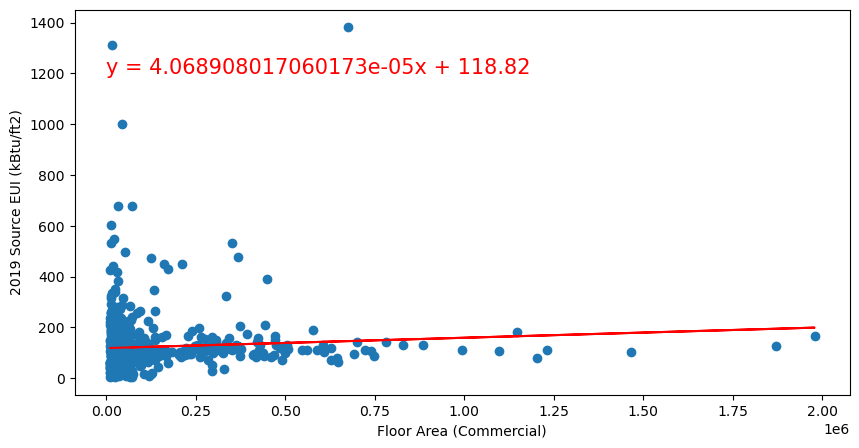

In [15]:

# Filter the DataFrame to include only 'Commercial' properties
commercial_df = clean_results_df[clean_results_df['Property Type'] == 'Commercial']
plt.figure(figsize=(10, 5))

# Extract the floor area and energy use values as floats
flr_area_4c = commercial_df.iloc[:, 1].astype(float)
engy_use_2019c = commercial_df.iloc[:, 11].astype(float)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_4c, engy_use_2019c)

# Calculate regression line values
regress_values = flr_area_4c * slope + intercept

plt.plot(flr_area_4c, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 1200), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_4c = rvalue

# Create a scatter plot using the floor area and energy use columns
plt.scatter(flr_area_4c, engy_use_2019c)

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Commercial)')
plt.ylabel('2019 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between commercial buildings floor area and their energy use in 2019 in SF is: {round(correlation_4c, 4)}')

# Display the plot
plt.show()


The correlation between mixed residential buildings floor area and their energy use in 2019 in SF is: -0.0477


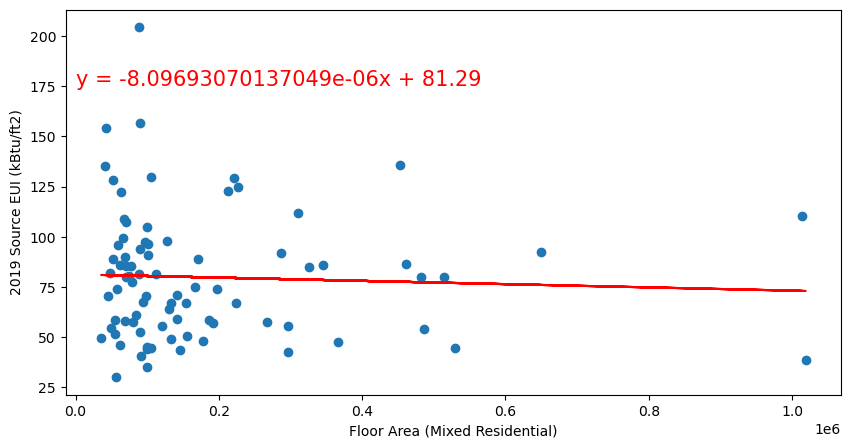

In [16]:

# Filter the DataFrame to include only 'Mixed Residential' properties
Mixed_Residential_df = clean_results_df[clean_results_df['Property Type'] == 'Mixed Residential']

plt.figure(figsize=(10, 5))

# Extract the floor area and energy use values as floats
flr_area_4m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2019m = Mixed_Residential_df.iloc[:, 11].astype(float)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_4m, engy_use_2019m)

# Calculate regression line values
regress_values = flr_area_4m * slope + intercept

plt.plot(flr_area_4m, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 175), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_4m = rvalue

# Create a scatter plot using the floor area and energy use columns
plt.scatter(flr_area_4m, engy_use_2019m)

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Mixed Residential)')
plt.ylabel('2019 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between mixed residential buildings floor area and their energy use in 2019 in SF is: {round(correlation_4m, 4)}')

# Display the plot
plt.show()



The correlation between commercial buildings floor area and their energy use in 2018 in SF is: 0.0724


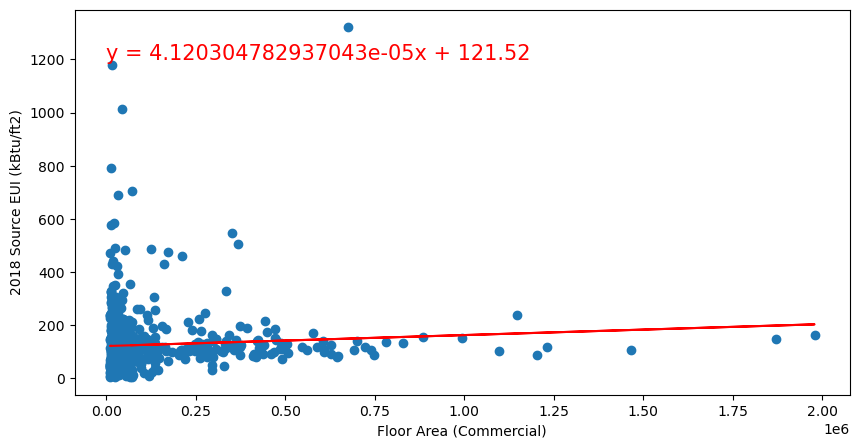

In [17]:

# Filter the DataFrame to include only 'Commercial' properties
commercial_df = clean_results_df[clean_results_df['Property Type'] == 'Commercial']

plt.figure(figsize=(10, 5))

# Extract the floor area and energy use values as floats
flr_area_5c = commercial_df.iloc[:, 1].astype(float)
engy_use_2018c = commercial_df.iloc[:, 13].astype(float)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_5c, engy_use_2018c)

# Calculate regression line values
regress_values = flr_area_5c * slope + intercept

plt.plot(flr_area_5c, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 1200), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_5c = rvalue

# Create a scatter plot using the floor area and energy use columns
plt.scatter(flr_area_5c, engy_use_2018c)

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Commercial)')
plt.ylabel('2018 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between commercial buildings floor area and their energy use in 2018 in SF is: {round(correlation_5c, 4)}')

# Display the plot
plt.show()


The correlation between mixed residential buildings floor area and their energy use in 2018 in SF is: -0.0304


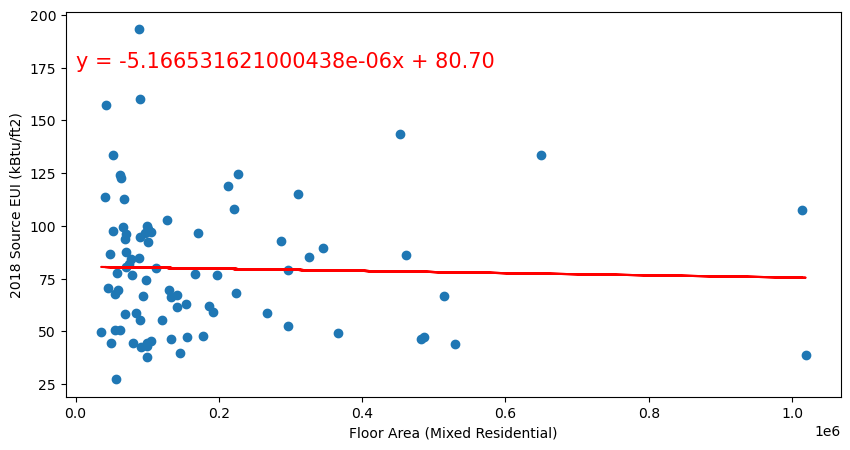

In [18]:

# Filter the DataFrame to include only 'Mixed Residential' properties
Mixed_Residential_df = clean_results_df[clean_results_df['Property Type'] == 'Mixed Residential']

plt.figure(figsize=(10, 5))

# Extract the floor area and energy use values as floats
flr_area_5m = Mixed_Residential_df.iloc[:, 1].astype(float)
engy_use_2018m = Mixed_Residential_df.iloc[:, 13].astype(float)

# Calculate the correlation between floor area and energy use
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(flr_area_5m, engy_use_2018m)

# Calculate regression line values
regress_values = flr_area_5m * slope + intercept

plt.plot(flr_area_5m, regress_values, "r-")

# Create the equation string
equation = f"y = {slope}x + {intercept:.2f}"

# Add the equation to the plot
plt.annotate(equation, (0.00, 175), fontsize=15, color="red")

# Calculate the correlation coefficient
correlation_5m = rvalue

# Create a scatter plot using the floor area and energy use columns
plt.scatter(flr_area_5m, engy_use_2018m)

# Set labels for the x-axis and y-axis
plt.xlabel('Floor Area (Mixed Residential)')
plt.ylabel('2018 Source EUI (kBtu/ft2)')

# Print the correlation value
print(f'The correlation between mixed residential buildings floor area and their energy use in 2018 in SF is: {round(correlation_5m, 4)}')

# Display the plot
plt.show()


In [19]:

# Create a list of correlation values for each property type and year
correlation_values = [correlation_1c, correlation_1m, correlation_2c, correlation_2m, correlation_3c, correlation_3m, correlation_4c, correlation_4m, correlation_5c, correlation_5m]

# Create a list of correlation values for commercial properties
commercial_correlation_values = [correlation_values[0], correlation_values[2], correlation_values[4], correlation_values[6], correlation_values[8]]

# Create a list of correlation values for mixed residential properties
mixed_residential_correlation_values = [correlation_values[1], correlation_values[3], correlation_values[5], correlation_values[7], correlation_values[9]]

# Calculate the mean correlation for commercial properties
mean_commercial_correlation = np.mean(commercial_correlation_values)

# Calculate the mean correlation for mixed residential properties
mean_mixed_residential_correlation = np.mean(mixed_residential_correlation_values)

# Print the mean correlation values
print("Mean correlation for Commercial property type:", mean_commercial_correlation)
print("Mean correlation for Mixed Residential property type:", mean_mixed_residential_correlation)



Mean correlation for Commercial property type: 0.0805832669848815
Mean correlation for Mixed Residential property type: -0.07100691036067878


In [ ]:
# Define the property types
property_types = ['Commercial', 'Mixed Residential']
plt.figure(figsize=(10,5))
# Define the mean correlation values for each property type
correlation_values = [mean_commercial_correlation, mean_mixed_residential_correlation]

# Create a bar plot
plt.bar(property_types, correlation_values)

# Add labels and title to the plot
plt.xlabel('Property Type')
plt.ylabel('Mean Correlation Value')
plt.title('Mean Correlation between Energy Use and Floor Area by Property Type')

# Display the plot
plt.show()



The mean correlation value for the Commercial property type indicates the strength and direction of the relationship between energy use and floor area in commercial buildings. A positive correlation suggests that there is a tendency for higher energy use with increasing floor area in commercial properties. This finding is significant for businesses and policymakers as it implies that larger commercial properties tend to have higher energy demands, potentially requiring more efficient energy management strategies and sustainable practices.

On the other hand, A negative correlation between energy use and floor area in Mixed Residential property types suggests that larger floor areas in such buildings are associated with lower energy consumption. This finding can have several potential explanations. It could be due to more efficient building designs, the use of energy-saving technologies, or a higher adoption of sustainable practices in larger mixed residential properties. These buildings might have implemented energy-efficient systems, insulation, or renewable energy sources, resulting in reduced energy consumption.

These findings underscore the significance of implementing energy management strategies and sustainable practices in commercial buildings, while highlighting the potential for energy-efficient designs and technologies in larger mixed residential properties.


Question #1: What property subcategory type has the highest source energy use intensity and greenhouse gas emissions per square footage in the year 2022?
Need to create two bar charts
X-Axis (property subcategory), Y-Axis (Greenhouse gas emission intensity 2022)
X-Axis (property subcategory), Y-Axis (Source energy use intensity 2022)


Question # 2: For commercial buildings, check if there is a relationship between year built and greenhouse gas emission intensity, as well as year built and source energy use intensity in 2022
Need to create two line graphs
X-Axis (buckets for year built), Y-Axis (Greenhouse gas emission intensity 2022)
X-Axis (buckets for year built), Y-Axis (Source energy use intensity 2022)

Question #3: Has the greenhouse gas emission intensity for commercial and residential buildings decreased since 2018?
Need to create two line graphs
X-Axis (years, 2018-2022), Y-Axis (take average of Greenhouse gas emission intensity each year, commercial buildings)
X-Axis (years, 2018-2022), Y-Axis (take average of Greenhouse gas emission intensity each year, residential buildings)

Question #4: Is there a correlation between energy use and building floor area?
Need to create a bar graph
X-Axis (property type), Y-Axis (correlation value from correlation function between energy use and floor area)
